# Tutorial

### Instructions

In this tutorial, you will be creating a classifcation model. The data were collected from the Taiwan Economic Journal for the years 1999 to 2009. Company bankruptcy was defined based on the business regulations of the Taiwan Stock Exchange. Apply what you have learnt and come up with the optimal model to predict if a company goes bankrupt or not. 

Bonus: Determine what are the key features that influence your model. 

 PS: If you find a technique/method that you believe was not shared in class but useful; you can and should use it. No points will be deducted for trying! Do not delete your trial scripts, these will be important for you to understand where you improved from your previous attempts.

given model score, why did u choose a higher accuracy score vs higher precision score

why did u choose a specific model to present to us.
-precision score?
- t score
-accuracy score.

In [ ]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn import tree

data = pd.read_csv('Datasets/data.csv')
data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [37]:
data.info() 
#no have null data so no need to clean it 



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

## Finding the most important feature

Depth = 1, train_acc = 0.9705, eval_acc = 0.9580
Depth = 2, train_acc = 0.9711, eval_acc = 0.9531
Depth = 3, train_acc = 0.9744, eval_acc = 0.9550
Depth = 4, train_acc = 0.9803, eval_acc = 0.9541
Depth = 5, train_acc = 0.9839, eval_acc = 0.9550


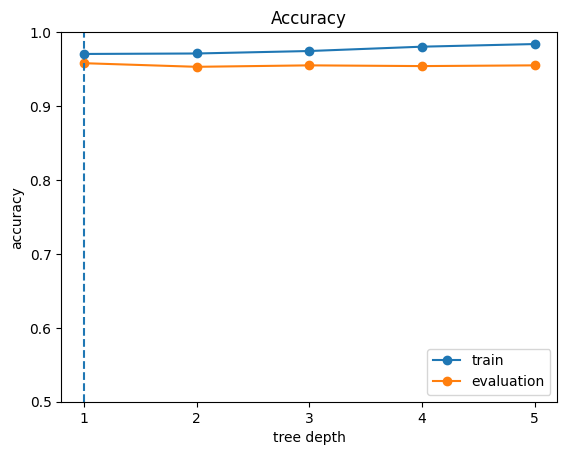

In [45]:
#using random forest as the problem is a classification type of problem.
y = data['Bankrupt?'] #select test data
x = data.drop('Bankrupt?', axis = 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
x_test, x_eval, y_test, y_eval = train_test_split(x_test, y_test, test_size = 0.5)

train_acc = []
eval_acc = []
max_depth = 5
for d in range(1, max_depth+1):
    model = DecisionTreeClassifier(max_depth=d)
    model.fit(x_train, y_train)
    
    # Measure the accuracy of this model using the training data.
    y_pred = model.predict(x_train)
    train_acc.append((y_pred == y_train).mean())

    # Measure the accuracy of this model using the validation data.
    y_pred = model.predict(x_eval)
    eval_acc.append((y_pred == y_eval).mean())
    print('Depth = {}, train_acc = {:.4f}, eval_acc = {:.4f}'\
          .format(d, train_acc[-1], eval_acc[-1]))

# Find the optimal depth with the highest accuracy of validation data.
opt_depth = np.argmax(eval_acc) + 1

# Visualize accuracy changes as depth changes.
plt.plot(train_acc, marker='o', label='train')
plt.plot(eval_acc, marker='o', label='evaluation')
plt.legend()
plt.title('Accuracy')
plt.xlabel('tree depth')
plt.ylabel('accuracy')
plt.xticks(np.arange(max_depth), np.arange(1, max_depth+1))
plt.axvline(x=opt_depth-1, ls='--')
plt.ylim(0.5, 1.0)
plt.show()

Optimal depth = 1, test_acc = 0.9775


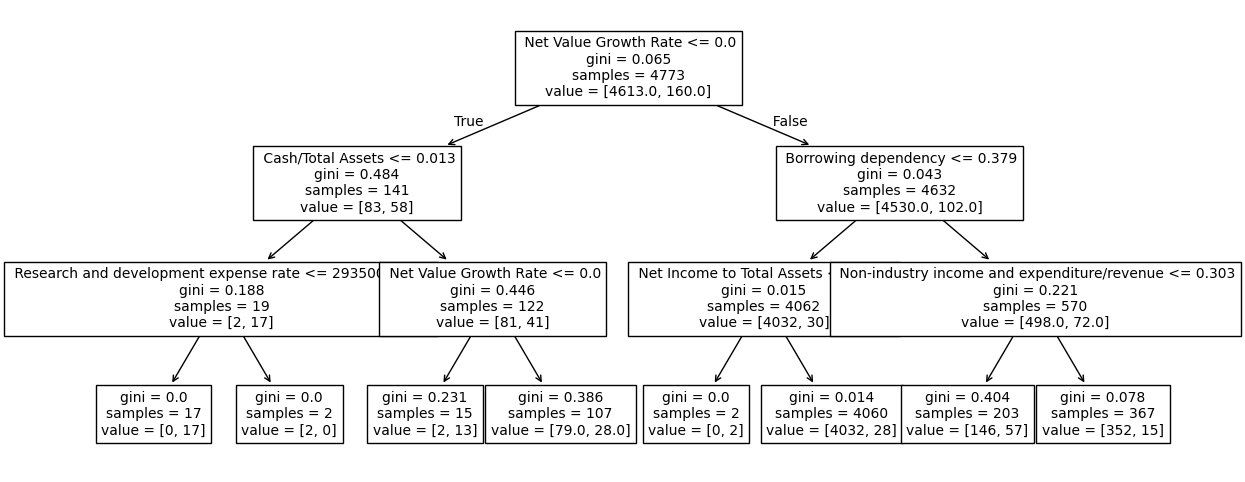

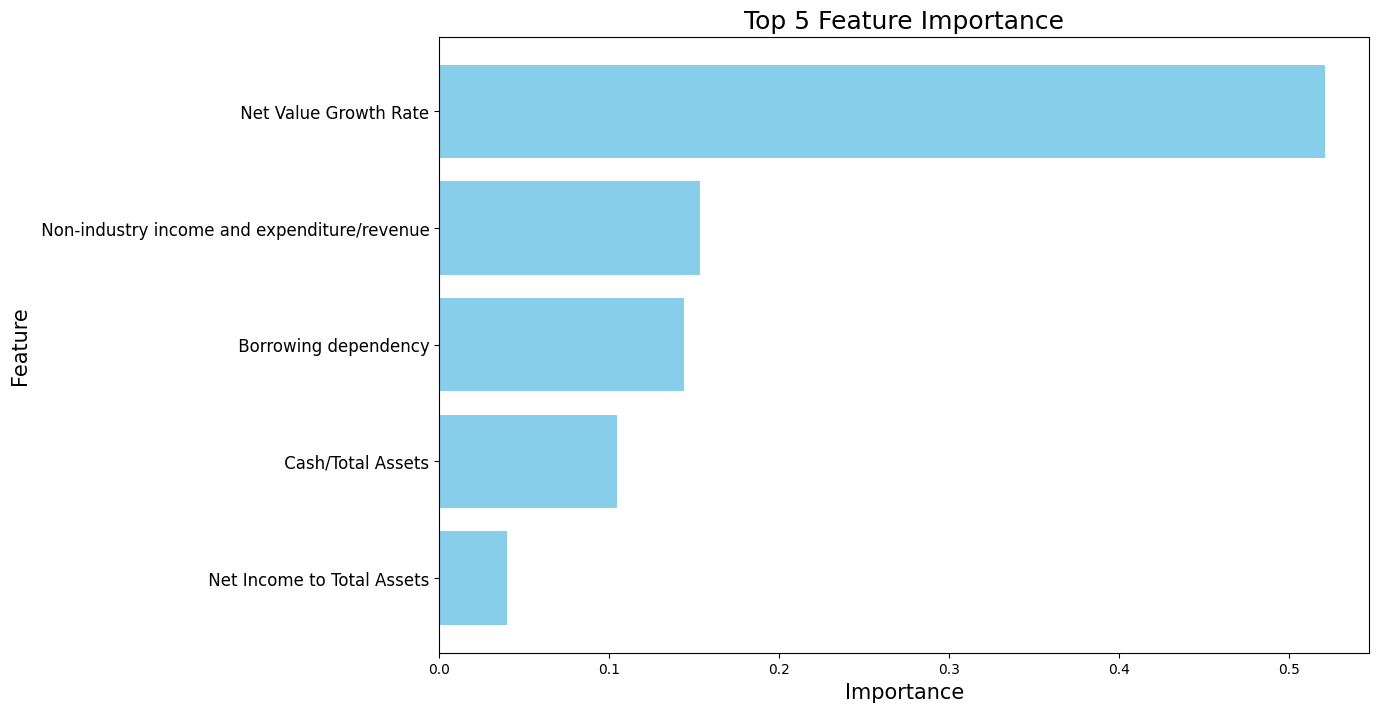

The most important data set is 'Net income to Stockholder's equity'


In [39]:
# set max depth equals to 3
model = DecisionTreeClassifier(max_depth=3)
model.fit(x_train, y_train)

# Use test data to evaluate final performance.
y_pred = model.predict(x_test)
test_acc = (y_pred == y_test).mean()
print('Optimal depth = {}, test_acc = {:.4f}'.format(opt_depth, test_acc))
        
# Visualize the tree
feat_names = x.columns.tolist()
plt.figure(figsize=(14,6))
tree.plot_tree(model, feature_names = feat_names, fontsize=10)
plt.show()

# Analyze the importance of features.
feature_importance = model.feature_importances_
n_feature = x_train.shape[1]
idx = np.arange(n_feature)

sorted_idx = np.argsort(feature_importance)[::-1]  # Sort in descending order
top_n = 5
top_idx = sorted_idx[:top_n]
top_features = np.array(feat_names)[top_idx]
top_importance = feature_importance[top_idx]

# Plot top 5 feature importances as theres too much data set
plt.figure(figsize=(12,8))
plt.barh(np.arange(top_n), top_importance, align='center', color='skyblue')
plt.yticks(np.arange(top_n), top_features, size=12)
plt.xlabel('Importance', size=15)
plt.ylabel('Feature', size=15)
plt.title('Top 5 Feature Importance', size=18)
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()


print("The most important data set is 'Net income to Stockholder's equity'")

## Random forest 

Use random forest as:

Positives
- random forest is efficient in handling large datasets
- the problem is a classification problem as the outcome is binary

Negatives:
- mutliple decision trees may cause the model to be hard to understand
- result may be biased if there are too many bankrupt companies compared not bankrupt ones (or vice-versa)


 High precision score is important when the cost of false positive is high, which in this case is true as incorrectly predicting wether a company goes bankrupt or not may have high cost implications for a business.
 
  Another reason to choose a higher precision score is our data is biased towards non-bankrupt comapnies, making a high accuracy score for a company not going bankrupt misleading as the dataset is has much more companies that are not bankrupt compared to those that are bankrupt.

In [40]:
data['Bankrupt?'].value_counts()

Bankrupt?
0    6599
1     220
Name: count, dtype: int64

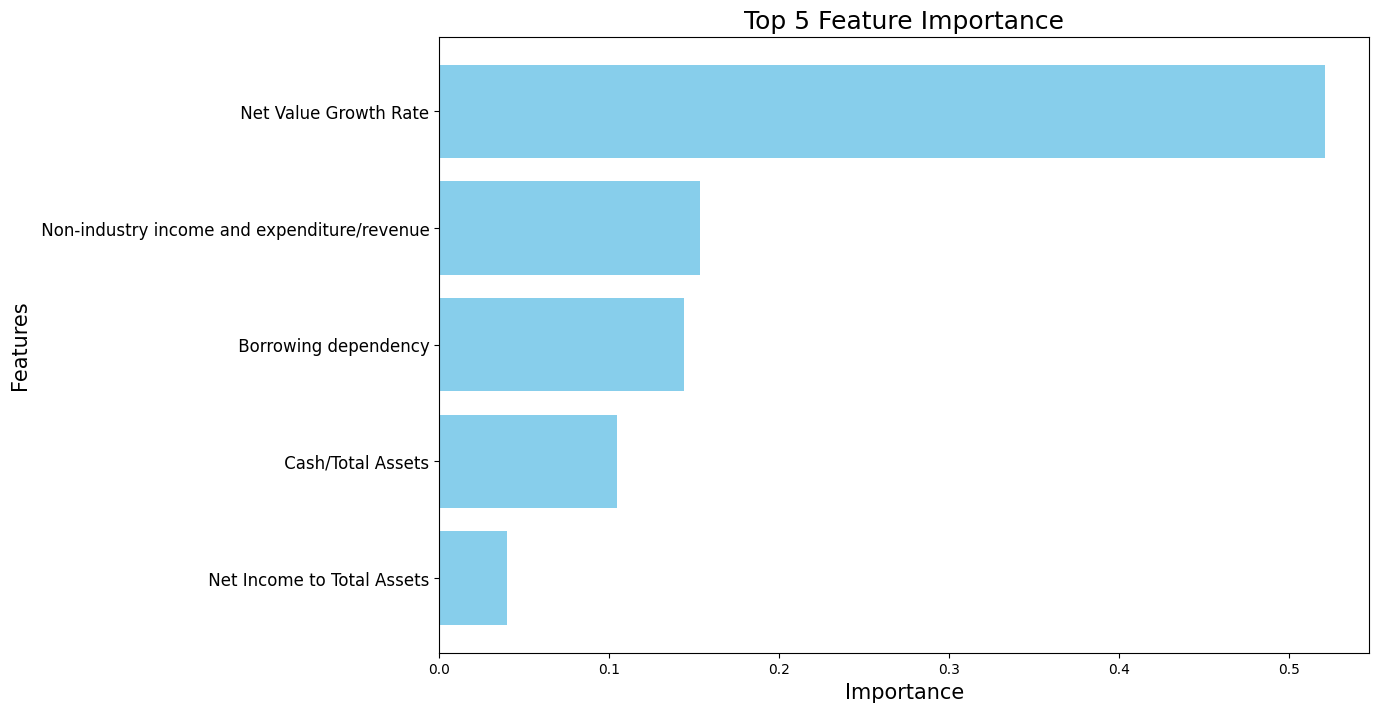


Results:
Accuracy = 0.9663
Final OOB error rate = 0.0297


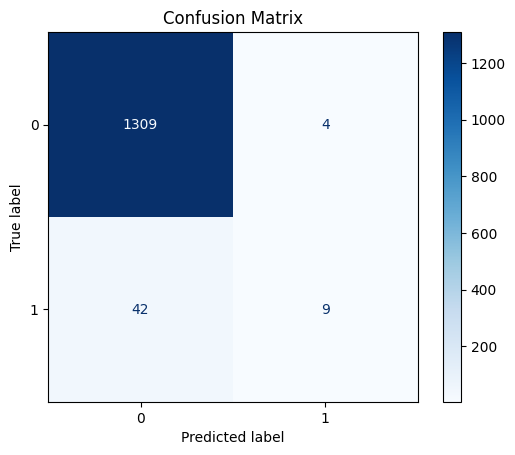

Precision Score: 0.6923076923076923

Classification Report:               precision    recall  f1-score   support

Non-bankrupt       0.97      1.00      0.98      1313
    Bankrupt       0.69      0.18      0.28        51

    accuracy                           0.97      1364
   macro avg       0.83      0.59      0.63      1364
weighted avg       0.96      0.97      0.96      1364

F1 Score: 0.281


In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_score,ConfusionMatrixDisplay,f1_score
import numpy as np
import matplotlib.pyplot as plt

# create training and test data
X = data.drop('Bankrupt?', axis=1)  # Features
y = data['Bankrupt?']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model with adjusted class weights
model = RandomForestClassifier(n_estimators=100, class_weight={0: 1, 1: 10}, random_state=42, oob_score=True)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Plot Feature Importance
feat_names = X_train.columns.tolist()  # Ensure you're using the correct feature names
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)[::-1]  # Sort in descending order

top_feature = 5

plt.figure(figsize=(12,8))
plt.barh(np.arange(top_feature), top_importance, align='center', color='skyblue')
plt.yticks(np.arange(top_feature), top_features, size=12)
plt.xlabel('Importance', size=15)
plt.ylabel('Features', size=15)
plt.title('Top 5 Feature Importance', size=18)
plt.gca().invert_yaxis()  # Most important feature at the top
plt.show()

print('\nResults:')
print('Accuracy = {:.4f}'.format((y_pred == y_test).mean()))
print('Final OOB error rate = {:.4f}'.format(1 - model.oob_score_))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Evaluate the model
print("Precision Score:", precision_score(y_test, y_pred, pos_label=1))
print("\nClassification Report:", classification_report(y_test, y_pred, target_names=['Non-bankrupt', 'Bankrupt']))

f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1:.3f}')

logistic regression


Accuracy of test data = 0.962


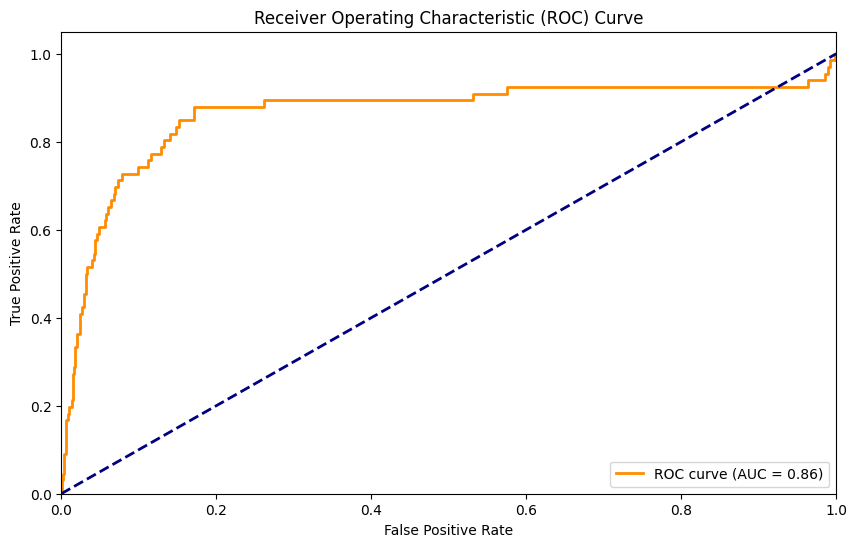

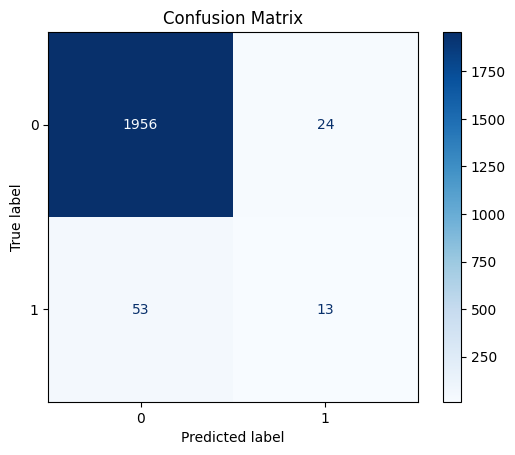

AUC Score: 0.864
F1 Score: 0.252

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1980
           1       0.35      0.20      0.25        66

    accuracy                           0.96      2046
   macro avg       0.66      0.59      0.62      2046
weighted avg       0.95      0.96      0.96      2046



In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,auc,roc_curve, confusion_matrix, precision_score,ConfusionMatrixDisplay,f1_score
import numpy as np

import matplotlib.pyplot as plt
X = data.drop('Bankrupt?', axis=1)
y = data['Bankrupt?']  

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
REG_CONST = 0.01

# Create a model and fit it to the training data.
# C := inverse of regularization strength
model = LogisticRegression(penalty='l2', C=1./REG_CONST, max_iter=300)
model.fit(x_train_scaled, y_train)

# Predict the classes of test data and measure the accuracy of test data
y_pred = model.predict(x_test_scaled)
acc = (y_pred == y_test).mean()
print('\nAccuracy of test data = {:.3f}'.format(acc))
y_pred_proba = model.predict_proba(x_test_scaled)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Create and plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Calculate F1 score
f1 = f1_score(y_test, y_pred)

# Print AUC score
print(f'AUC Score: {roc_auc:.3f}')
print(f'F1 Score: {f1:.3f}')

# Print Classification Report 
print("\nClassification Report:")
print(classification_report(y_test, y_pred))